In [571]:
import math 
import collections 
import urllib

import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import matplotlib.pyplot as plt
import numpy.char as char
%matplotlib inline

In [637]:
urllib.request.urlretrieve('https://www.ncei.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt',
                           'readme.txt')

('readme.txt', <http.client.HTTPMessage at 0x2867e70b0>)

In [573]:
urllib.request.urlretrieve('https://www.ncei.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt',
                           'stations.txt')

('stations.txt', <http.client.HTTPMessage at 0x14ecbfef0>)

In [574]:

stations = np.genfromtxt('stations.txt', delimiter=[11,9,10,7,3,31,4,4,6],
                                         names=['id','latitude','longitude','elevation','state','name',
                                                'gsn','hcn','wmo'],
                                         dtype=['U11','d','d','d','U3','U31','U4','U4','U6'],
                                         autostrip=True)

In [575]:
len(stations) #length of the stations 

127994

In [576]:
stations #this will show the stations whoich is the name of the variable in question 


array([('ACW00011604',  17.1167, -61.7833,   10.1, '', 'ST JOHNS COOLIDGE FLD', '', '', ''),
       ('ACW00011647',  17.1333, -61.7833,   19.2, '', 'ST JOHNS', '', '', ''),
       ('AE000041196',  25.333 ,  55.517 ,   34. , '', 'SHARJAH INTER. AIRP', 'GSN', '', '41196'),
       ...,
       ('ZI000067977', -21.017 ,  31.583 ,  430. , '', 'BUFFALO RANGE', '', '', '67977'),
       ('ZI000067983', -20.2   ,  32.616 , 1132. , '', 'CHIPINGE', 'GSN', '', '67983'),
       ('ZI000067991', -22.217 ,  30.    ,  457. , '', 'BEITBRIDGE', '', '', '67991')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

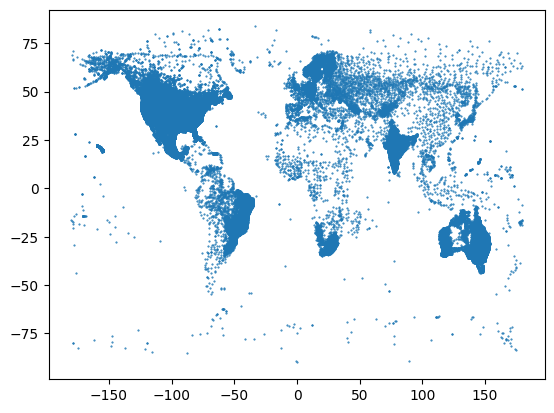

In [577]:
pp.plot(stations['longitude'],stations['latitude'], '.', markersize=1) 
#with this code using plot function to plot all the stations in a map; latitude and the longitude and a map is formed due to the ppsitions in the graphj

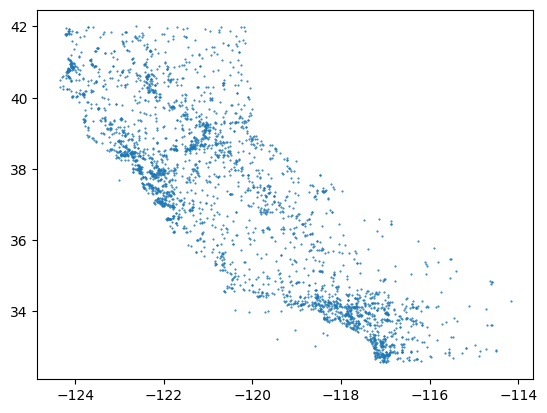

In [578]:
#here we are filtering in a specific state the latitude and longitude in the state of california
stations_ca=stations[stations['state']== 'CA'] #select state first
pp.plot(stations_ca['longitude'], stations_ca['latitude'], '.', markersize=1) #plot made 

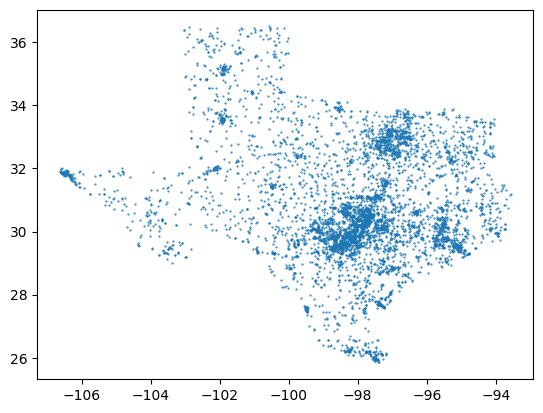

In [579]:
#if making the same as above but with Texas:
stations_tx=stations[stations['state']== 'TX'] #select state first
pp.plot(stations_tx['longitude'], stations_tx['latitude'], '.', markersize=1)

In [580]:
stations[stations['name'] == 'PASADENA']


array([('USC00046719', 34.1483, -118.1447, 263.3, 'CA', 'PASADENA', '', 'HCN', '')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

In [581]:
stations[np.char.find(stations['name'], 'PASADENA') == 0]

array([('CA1NL000026', 49.0094,  -57.5849,  52.4, 'NL', 'PASADENA 0.5 SE', '', '', ''),
       ('US1CALA0036', 34.1392, -118.1161, 225.2, 'CA', 'PASADENA 2.0 SE', '', '', ''),
       ('US1CALA0043', 34.1619, -118.1073, 277.7, 'CA', 'PASADENA 1.8 E', '', '', ''),
       ('US1CALA0091', 34.1648, -118.1249, 289. , 'CA', 'PASADENA 0.8 ENE', '', '', ''),
       ('US1CALA0124', 34.1336, -118.1416, 234.1, 'CA', 'PASADENA 1.9 S', '', '', ''),
       ('US1MDAA0010', 39.1038,  -76.5443,  13.1, 'MD', 'PASADENA 0.7 SE', '', '', ''),
       ('US1MDAA0013', 39.1263,  -76.5596,  18.9, 'MD', 'PASADENA 1.1 NNW', '', '', ''),
       ('US1MDAA0039', 39.0916,  -76.5112,  10.7, 'MD', 'PASADENA 2.6 ESE', '', '', ''),
       ('US1TXHRR076', 29.6471,  -95.1895,  10.7, 'TX', 'PASADENA 2.4 WSW', '', '', ''),
       ('US1TXHRR084', 29.6339,  -95.1881,  11.9, 'TX', 'PASADENA 2.8 SW', '', '', ''),
       ('US1TXHRR093', 29.6849,  -95.2197,   9.1, 'TX', 'PASADENA 4.4 WNW', '', '', ''),
       ('US1TXHRR094', 29.674

In [582]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/USC00046719.dly', 'PASADENA.dly')

('PASADENA.dly', <http.client.HTTPMessage at 0x286842db0>)

In [583]:
import getweather1 #importing the weather and then installing colorama  

In [584]:
help(getweather1.getyear) #help when importing the file 

Help on function getyear in module getweather1:

getyear(station_name, elements, year)
    Make a NumPy record array of length 365, containing weather data
    at station_name for the list of requested elements (TMIN/TMAX/PRCP/SNOW),
    restricted to year.

    If station_name is not in the list, find a station that _begins_
    with station_name, but give precedence to HCN and GSN stations.



In [585]:
getweather1.getyear('PASADENA', ['TMIN','TMAX'], 2000)

array([( 6.1, 14.4), ( 6.1, 18.3), ( 3.9, 18.3), ( 6.1, 20. ),
       ( 6.1, 20.6), ( 5.6, 20. ), ( 5.6, 18.3), ( 3.3, 21.7),
       ( 5. , 20.6), ( 6.1, 18.3), ( 6.7, 18.9), ( 8.3, 17.8),
       ( 7.8, 24.4), (11.1, 26.1), (12.8, 26.1), (13.3, 23.9),
       (13.3, 20.6), (13.9, 24.4), (11.1, 25.6), (12.8, 21.7),
       (11.7, 18.3), (10. , 18.3), ( 7.8, 20. ), (11.7, 22.8),
       (12.2, 21.7), ( 8.3, 20.6), ( 7.2, 20.6), ( 6.1, 21.7),
       ( 6.7, 21.7), (10. , 17.8), (11.1, 16.7), (13.3, 24.4),
       (11.1, 26.7), ( 9.4, 26.7), ( 8.9, 23.9), (10.6, 21.1),
       ( 6.7, 25. ), ( nan,  nan), (15.6, 26.7), (10. , 23.9),
       (10.6, 19.4), ( 5. , 18.3), ( 9.4, 17.8), ( 9.4, 15.6),
       (10.6, 16.7), ( 8.9, 19.4), (10. , 16.7), ( 7.2, 17.2),
       ( 6.1, 22.2), ( 7.8, 25. ), ( 9.4, 23.9), ( 6.7, 13.3),
       ( 7.2, 13.9), ( 7.8, 12.8), ( 2.8, 16.1), ( 8.3, 15. ),
       ( 5.6, 21.7), ( 8.3, 20.6), ( 4.4, 17.2), ( 7.2, 18.3),
       ( 6.7, 19.4), ( 7.2, 22.2), (17.2, 20. ), ( 7.2,

In [586]:
pasadena = getweather1.getyear('PASADENA', ['TMIN', 'TMAX'], 2001) #pasadena is the name of the variable

In [587]:
#here the process of cleaning the data and working with the missing values 
np.mean(pasadena['TMIN']), np.min(pasadena['TMIN']), np.max(pasadena['TMIN'])

(np.float64(nan), np.float64(nan), np.float64(nan))

In [588]:
pasadena['TMIN'] #This generates a list of the TMIN variablem after above was filtered

array([ 9.4,  8.3,  8.9,  8.3, 10. , 10.6,  7.2,  7.2,  7.8,  6.1,  5.6,
        6.1,  5. ,  3.9,  4.4,  2.8,  5. ,  3.9,  5.6,  7.2,  7.2,  8.9,
        5.6,  6.7,  3.3,  5.6,  3.3,  3.3,  3.3,  3.9,  5. ,  5. ,  6.1,
        nan,  7.2, 13.9, 11.1,  5.6,  2.2,  3.9,  6.1,  3.3,  5.6,  6.1,
        2.8,  2.8,  4.4,  7.8, 10. ,  9.4,  5.6,  5.6,  7.8,  5. ,  3.9,
        6.7,  7.2,  7.8,  6.7,  5. ,  5.6,  8.3,  9.4, 10. ,  9.4, 10. ,
        8.9, 10.6,  6.1,  8.9,  8.3,  7.2,  7.8, 10. , 10. ,  7.8, 10.6,
       13.3, 14.4, 10.6, 11.7, 11.1,  9.4, 10. , 12.2, 10. , 11.1, 12.8,
       12.8, 12.8, 12.2, 11.1, 10.6,  8.3,  8.3,  6.1,  7.2,  3.3, 16.1,
        3.9,  8.9,  7.8,  6.7,  7.2,  7.2,  9.4,  9.4, 12.2, 11.1,  8.9,
        6.1,  7.2, 10. , 10. , 16.1, 12.2, 12.8, 11.7,  nan, 11.1, 11.7,
       12.2, 11.1, 10.6, 11.1, 12.2, 13.3, 15.6, 16.1, 14.4, 13.3, 13.9,
       13.3, 10.6, 13.3, 13.9, 14.4, 15. ,  nan, 11.1, 14.4, 15. , 15.6,
       15. , 15.6, 16.7, 14.4, 14.4, 12.8, 13.9, 15

In [589]:
np.nan +1  #ig the word nan is going to be printed 

nan

In [590]:
np.isnan(pasadena['TMIN']) #here another array will be the output but is given in False and True to only then delete the missing values or 
#store them as n/a or incomplete value 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,

In [591]:
False + True + True #command 

2

In [592]:
np.sum(np.isnan(pasadena['TMIN']))

np.int64(15)

In [593]:
np.nanmin(pasadena['TMIN']), np.nanmax(pasadena['TMAX']) #here we are seeing the minimum and maximum values of pasadena and it shows the result of both

(np.float64(2.2), np.float64(41.1))

In [594]:
pasadena['TMIN'][np.isnan(pasadena['TMIN'])] = np.nanmean(pasadena['TMIN']) #here finding mean value of the min
pasadena['TMAX'][np.isnan(pasadena['TMAX'])] = np.nanmean(pasadena['TMAX'])# here the mean of the maximun 

In [595]:
#obtaining the value of pasadena minimum with the values
pasadena['TMIN']


array([ 9.4       ,  8.3       ,  8.9       ,  8.3       , 10.        ,
       10.6       ,  7.2       ,  7.2       ,  7.8       ,  6.1       ,
        5.6       ,  6.1       ,  5.        ,  3.9       ,  4.4       ,
        2.8       ,  5.        ,  3.9       ,  5.6       ,  7.2       ,
        7.2       ,  8.9       ,  5.6       ,  6.7       ,  3.3       ,
        5.6       ,  3.3       ,  3.3       ,  3.3       ,  3.9       ,
        5.        ,  5.        ,  6.1       , 11.45314286,  7.2       ,
       13.9       , 11.1       ,  5.6       ,  2.2       ,  3.9       ,
        6.1       ,  3.3       ,  5.6       ,  6.1       ,  2.8       ,
        2.8       ,  4.4       ,  7.8       , 10.        ,  9.4       ,
        5.6       ,  5.6       ,  7.8       ,  5.        ,  3.9       ,
        6.7       ,  7.2       ,  7.8       ,  6.7       ,  5.        ,
        5.6       ,  8.3       ,  9.4       , 10.        ,  9.4       ,
       10.        ,  8.9       , 10.6       ,  6.1       ,  8.9 

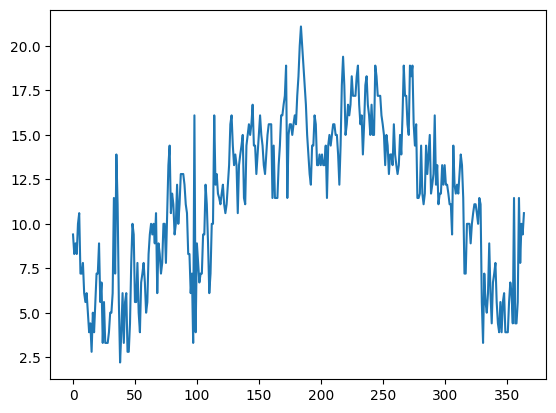

In [596]:
import matplotlib.pyplot as plt
pp.plot(pasadena['TMIN']) #plotting the above

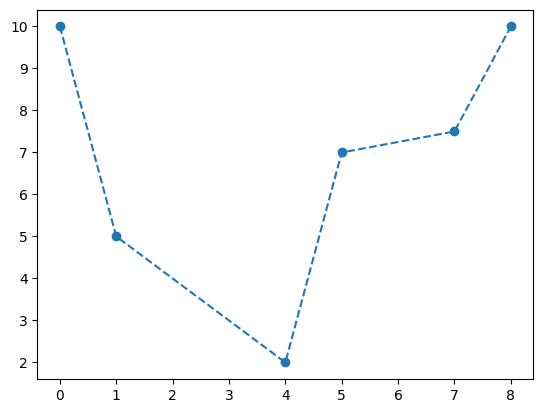

In [597]:
#here two arrays are being assigned
xvalues=np.array([0,1,4,5,7,8,], 'd') #the x values
yvalues=np.array([10,5,2,7,7.5,10],'d') #the y values
pp.plot(xvalues, yvalues, '--o') #plotting both in the format 

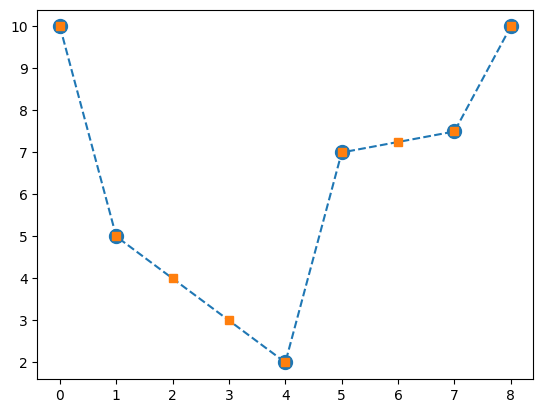

In [598]:
# interpolate x/y data with missing values to continuous x values

xnew = np.linspace(0, 8, 9)
ynew = np.interp(xnew, xvalues, yvalues)

pp.plot(xvalues, yvalues, '--o', ms=10)
pp.plot(xnew, ynew, 's')

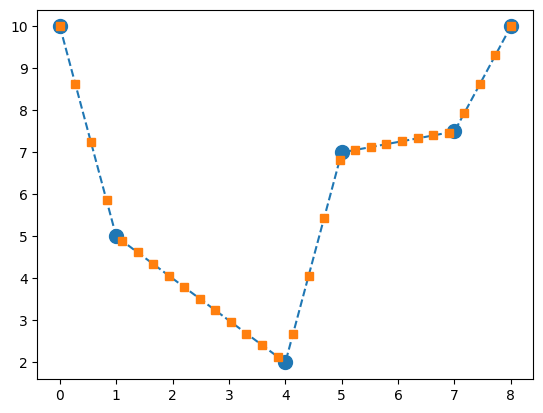

In [599]:
# interpolate x/y data with missing values to denser, continuous x values

xnew = np.linspace(0, 8, 30)
ynew = np.interp(xnew, xvalues, yvalues)

pp.plot(xvalues, yvalues, '--o', ms=10)
pp.plot(xnew, ynew, 's')
#here we observe the difference between the lines as here it has more orange than in the graph above 

In [600]:
pasadena = getweather1.getyear('PASADENA', ['TMIN', 'TMAX'], 2001) #here reference back to the getweather 1 

In [601]:
#here we made a boolean variable; then here we see that the result obtained is an array of values
good = ~np.isnan(pasadena['TMIN'])
x = np.arange(0, 365)

np.interp(x, x[good], pasadena['TMIN'][good]) #interprpeting the tmin

array([ 9.4  ,  8.3  ,  8.9  ,  8.3  , 10.   , 10.6  ,  7.2  ,  7.2  ,
        7.8  ,  6.1  ,  5.6  ,  6.1  ,  5.   ,  3.9  ,  4.4  ,  2.8  ,
        5.   ,  3.9  ,  5.6  ,  7.2  ,  7.2  ,  8.9  ,  5.6  ,  6.7  ,
        3.3  ,  5.6  ,  3.3  ,  3.3  ,  3.3  ,  3.9  ,  5.   ,  5.   ,
        6.1  ,  6.65 ,  7.2  , 13.9  , 11.1  ,  5.6  ,  2.2  ,  3.9  ,
        6.1  ,  3.3  ,  5.6  ,  6.1  ,  2.8  ,  2.8  ,  4.4  ,  7.8  ,
       10.   ,  9.4  ,  5.6  ,  5.6  ,  7.8  ,  5.   ,  3.9  ,  6.7  ,
        7.2  ,  7.8  ,  6.7  ,  5.   ,  5.6  ,  8.3  ,  9.4  , 10.   ,
        9.4  , 10.   ,  8.9  , 10.6  ,  6.1  ,  8.9  ,  8.3  ,  7.2  ,
        7.8  , 10.   , 10.   ,  7.8  , 10.6  , 13.3  , 14.4  , 10.6  ,
       11.7  , 11.1  ,  9.4  , 10.   , 12.2  , 10.   , 11.1  , 12.8  ,
       12.8  , 12.8  , 12.2  , 11.1  , 10.6  ,  8.3  ,  8.3  ,  6.1  ,
        7.2  ,  3.3  , 16.1  ,  3.9  ,  8.9  ,  7.8  ,  6.7  ,  7.2  ,
        7.2  ,  9.4  ,  9.4  , 12.2  , 11.1  ,  8.9  ,  6.1  ,  7.2  ,
      

In [602]:
def fillnans(array):
    good = ~np.isnan(array)
    x = np.arange(len(array))

    return np.interp(x, x[good], array[good])
#interpolation and te nans?

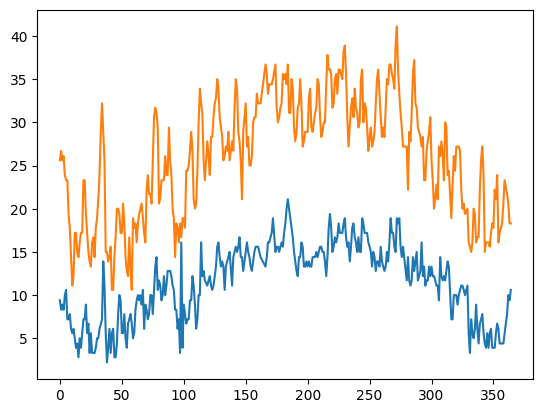

In [603]:
#using the function above to build 2 plots; they are int he same graph because they have the same function but changes one with the min and one with the maximum
#in this case we refer to them as the temperatures 
pp.plot(fillnans(pasadena['TMIN']))
pp.plot(fillnans(pasadena['TMAX']))

In [ ]:
#SMOOTHING THE DATA BELOW:

In [604]:
import getweather1

def fillnans(array):
    x = np.arange(len(array))
    good = ~np.isnan(array)

    return np.interp(x, x[good], array[good])

In [605]:
hilo= getweather1.getyear('HILO',['TMIN', 'TMAX'],2000)

In [606]:
hilo['TMIN'], hilo['TMAX'] = fillnans(hilo['TMIN']), fillnans(hilo['TMAX'])
np.mean(hilo['TMIN']), np.min(hilo['TMIN']), np.max(hilo['TMIN'])

(np.float64(19.102739726027398), np.float64(14.4), np.float64(23.3))

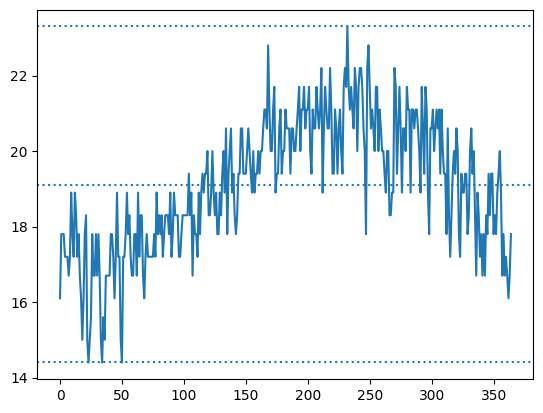

In [607]:
pp.plot(hilo['TMIN']) #plotting the minimum values 
for value in [np.mean(hilo['TMIN']), np.min(hilo['TMIN']), np.max(hilo['TMIN'])]:
    pp.axhline(value, linestyle=':')

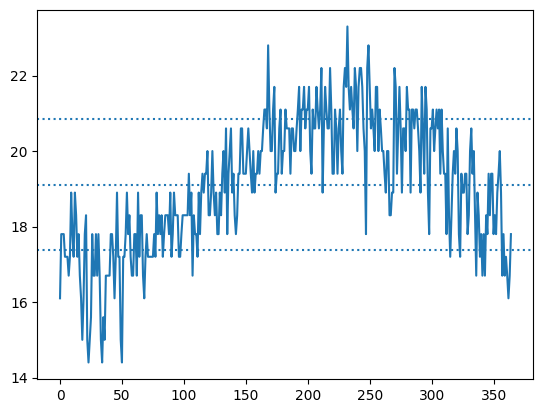

In [608]:
mean, err = np.mean(hilo['TMIN']), math.sqrt(np.var(hilo['TMIN']))
pp.plot(hilo['TMIN'])

# plot horizontal lines at mean, mean - std error, and mean + std error
for value in [mean, mean - err, mean + err]:
    pp.axhline(value, linestyle=':')
#THE DIFFERNCE BEYTWEEN THIS AND THE GRAPH ABOVE IS THAT THIS ONE HAS 3 DIFF LINES 

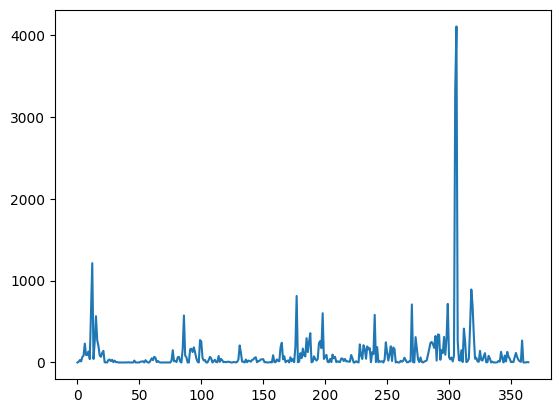

In [609]:
rain = getweather1.getyear('HILO', ['PRCP'], 2000)['PRCP'] #new variable called rain; where precipitation will be obtained 
pp.plot(rain) #plotting the precipitation 

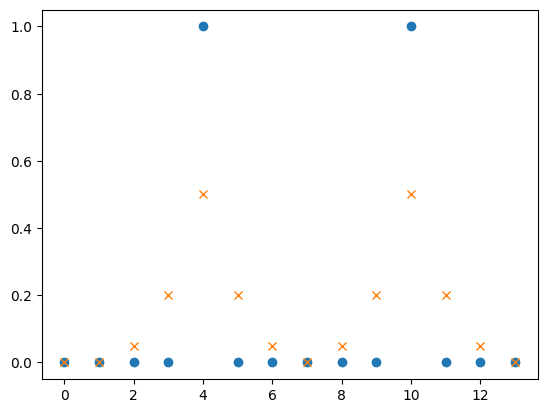

In [610]:
# show the effects of correlating a sparse vector
# with a triangular mask
x = np.array([0,0,0,0,1,0,0,0,0,0,1,0,0,0])
mask = np.array([0.05,0.2,0.5,0.2,0.05])
y = np.correlate(x, mask, 'same')
pp.plot(x, 'o')
pp.plot(y, 'x')

#hwere we are plotting the dots and crosses depoending in the variable to compare between the two of them

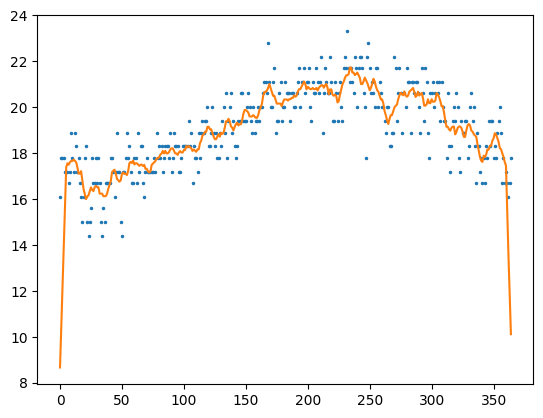

In [611]:
np.ones(10)/10 #this will show the value?/]
pp.plot(hilo['TMIN'], '.', ms=3)
pp.plot(np.correlate(hilo['TMIN'], np.ones(10)/10, 'same'))
#this maks it look smoother with mask length of 10 and see if there is any correlation between the two variables
#same vs valid 

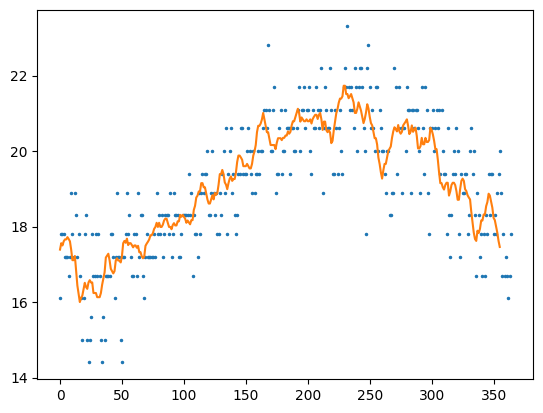

In [612]:
pp.plot(hilo['TMIN'], '.', ms=3)
pp.plot(np.correlate(hilo['TMIN'], np.ones(10)/10, 'valid')) #here is the same but what changes is that now tals the valus only that are valid 
#same vs valid 

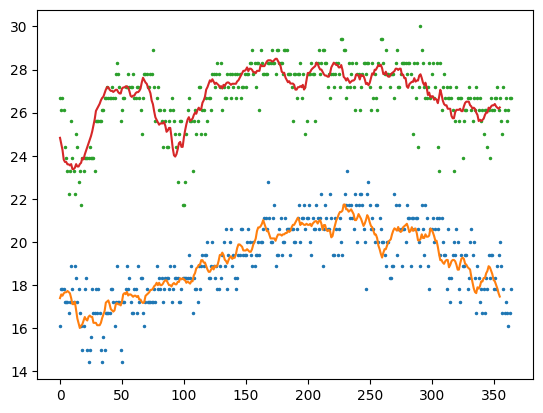

In [613]:
def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode) #here we smoothed the array

pp.plot(hilo['TMIN'], '.', ms=3)
pp.plot(smooth(hilo['TMIN'], 10))

pp.plot(hilo['TMAX'], '.', ms=3)
pp.plot(smooth(hilo['TMAX'], 10)) 
#see how the graph is evolutioning and now looks more smooth

(np.float64(1.0), np.float64(365.0), np.float64(15.0), np.float64(30.0))

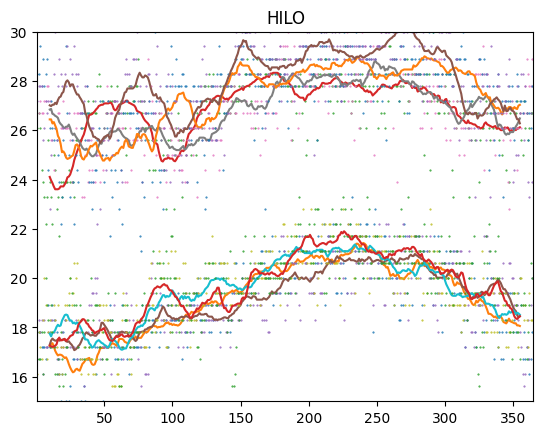

In [614]:
# load TMIN and TMAX data for a station and year; fill NaNs;
# plot unsmoothed data as dots, smoothed data as lines,
# dropping boundary values and adjusting x axis consistently

def plotsmooth(station, year): #defining a function 
    stationdata = getweather1.getyear(station, ['TMIN','TMAX'], year)

    for obs in ['TMIN','TMAX']:   #making a for loop here
        stationdata[obs] = fillnans(stationdata[obs])
    
        # thinner points
        pp.plot(stationdata[obs], '.', ms=1)
        pp.plot(range(10,356), smooth(stationdata[obs], 20))
    
    pp.title(station) #adding the title 
    pp.axis(xmin=1, xmax=365, ymin=-10, ymax=45) #making the axis 

#we the function above we are able to make this graph when itnroducinv the different years that we want to analyze 
plotsmooth('HILO', 2000)
plotsmooth('HILO', 2001)
plotsmooth('HILO', 2002)
plotsmooth('HILO', 2003)

pp.axis(ymin=15,ymax=30)

In [615]:
# if we wan to plot cities:
# plot four cities in a two-by-two grid

#pp.figure(figsize=(12,9))

#for i, city in enumerate(['PASADENA','NEW YORK','SAN DIEGO','MINNEAPOLIS']):
    #pp.subplot(2,2,i+1)
    #plotsmooth(city, 2000)

In [616]:
#NOW TO MAKE THE WEATHER CHARTS 


In [617]:
allyears=np.vstack([getweather1.getyear('PASADENA', ['TMIN','TMAX'], year)
                      for year in range(1910, 2019)])
#here we will obtained stacked information about the city pasadena from 1910 to 2019

<function matplotlib.pyplot.colorbar(mappable: 'ScalarMappable | None' = None, cax: 'matplotlib.axes.Axes | None' = None, ax: 'matplotlib.axes.Axes | Iterable[matplotlib.axes.Axes] | None' = None, **kwargs) -> 'Colorbar'>

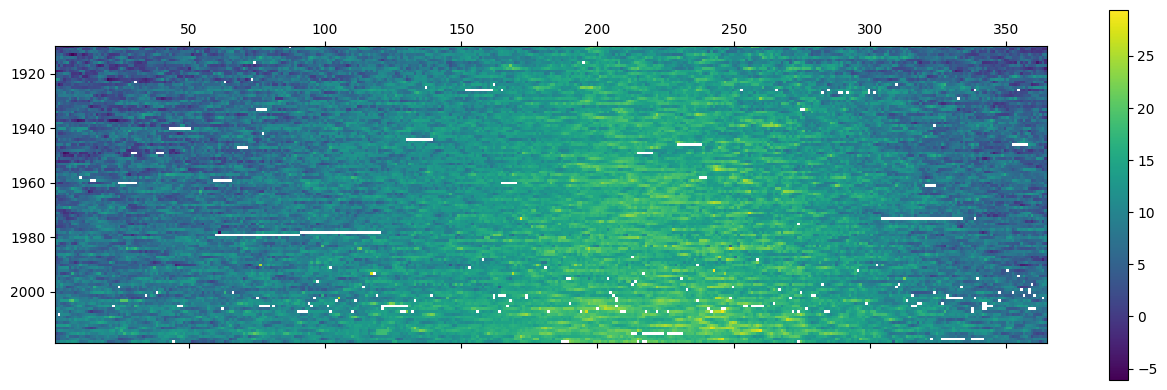

In [618]:
pp.matshow(allyears['TMIN'], extent=[1,365,2019,1910])
plt.colorbar() 
pp.colorbar #this shows kind of a heat map??

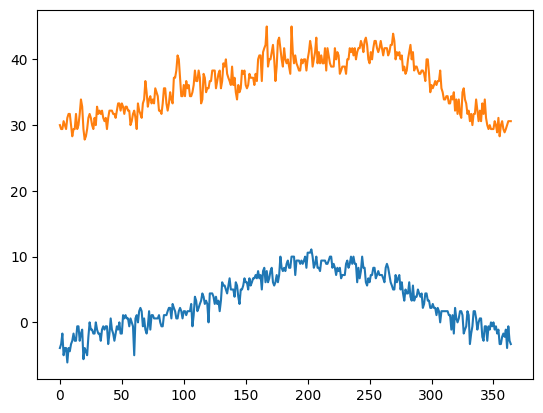

In [619]:
tmin_record=np.nanmin(allyears['TMIN'], axis=0)
tmax_record=np.nanmax(allyears['TMAX'], axis=0)
#here we will organize the minimum and maximum temperatures but of all the years together 
#then we plot 
pp.plot(tmin_record)
pp.plot(tmax_record)

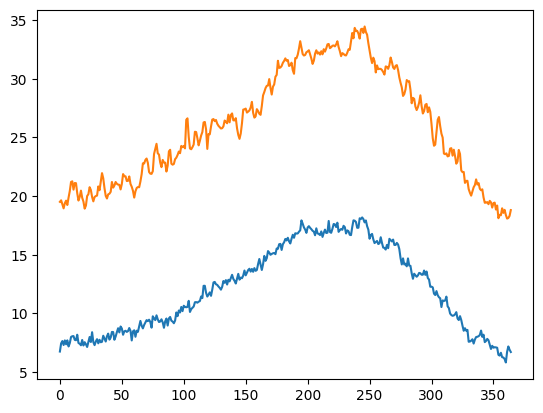

In [620]:
#adding a normal variable;to get them stacked verticallyt
normal= np.vstack([getweather1.getyear('PASADENA', ['TMIN','TMAX'], year)
                    for year in range(1981, 2011)]) #from these years in pasadena show the min and max temperatures
#finding the means
tmin_normal = np.nanmean(normal['TMIN'], axis=0)
tmax_normal = np.nanmean(normal['TMAX'], axis=0)

#plotting it 
pp.plot(tmin_normal)
pp.plot(tmax_normal)

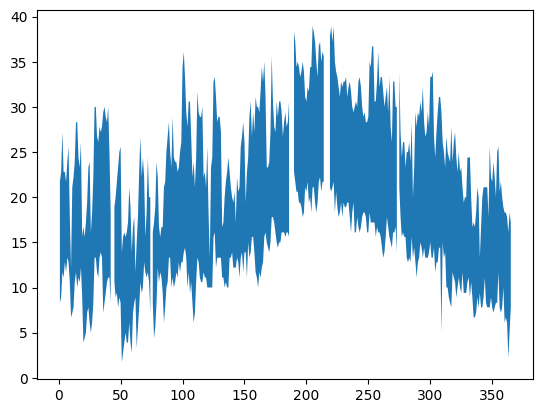

In [621]:
station, year = 'PASADENA', 2018
#making new variables
thisyear = getweather1.getyear(station, ['TMIN', 'TMAX'], year)
days = np.arange(1, 366)

pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX']) #this will make a chart where its filled betweenn the max and min in this year; shows the range

In [622]:
avg = 0.5*(np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))
avg #showign the average temperature this year;  
# formatted string literal: will insert values of variable in braces
f'{station}, {year}: average temperature = {avg:.2f} C'



'PASADENA, 2018: average temperature = 19.46 C'

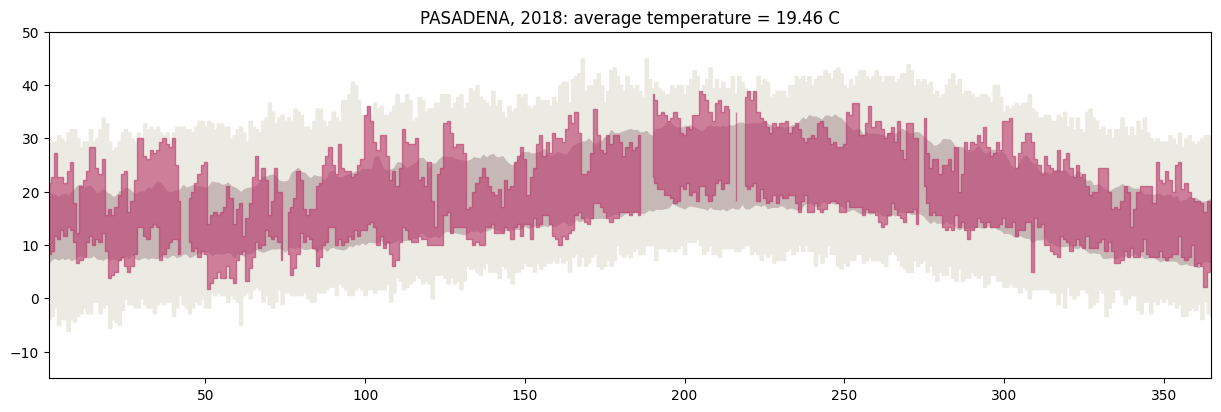

In [623]:
# show normals, records, and current year bands together

pp.figure(figsize=(15,4.5))

pp.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.89), step='mid')
pp.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.72))

pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'],
                color=(0.73,0.21,0.41), alpha=0.6, step='mid')

pp.axis(xmin=1, xmax=365, ymin=-15, ymax=50)

pp.title(f'{station}, {year}: average temperature = {avg:.2f} C');

#here it will make it look alltogether and more congruent and neat
#the tittle isput along with the average

In [624]:
#now we are going to collect the chart and make it for cities any year
def nyplot(station, year): #define function
    pp.figure(figsize=(15,4.5)) #figure size definitiin
    
    allyears = np.vstack([getweather1.getyear(station, ['TMIN','TMAX'], year)
                          for year in range(1910, 2020)]) #all years min and max
    
    normal = np.vstack([getweather1.getyear(station, ['TMIN','TMAX'], year)
                        for year in range(1981, 2011)]) #the normal from he years

    tmin_record, tmax_record = np.nanmin(allyears['TMIN'], axis=0), np.nanmax(allyears['TMAX'], axis=0) #record extremes
    tmin_normal, tmax_normal = np.nanmean(normal['TMIN'], axis=0), np.nanmean(normal['TMAX'], axis=0) #the average or normal

    days = np.arange(1, 366) #days making the variable 365 as its 365 days in one year

    pp.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.89), step='mid') #filling in the values extreme
    pp.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.72)) #filling in the values for normal
    
    thisyear = getweather1.getyear(station, ['TMIN', 'TMAX'], year) #this year= current 

    pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'], color=(0.73,0.21,0.41), alpha=0.6, step='mid') #uses alpha command and to fill using colors

    pp.axis(xmin=1, xmax=365, ymin=-15, ymax=50) #here we determine the axis that will be used 
    
    avg = 0.5*(np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX'])) #here to obtain the average temperature 
    pp.title(f'{station}, {year}: average temperature = {avg:.2f} C'); #in the tittle to show the f string of the station and average temperature= depending on the city chosen


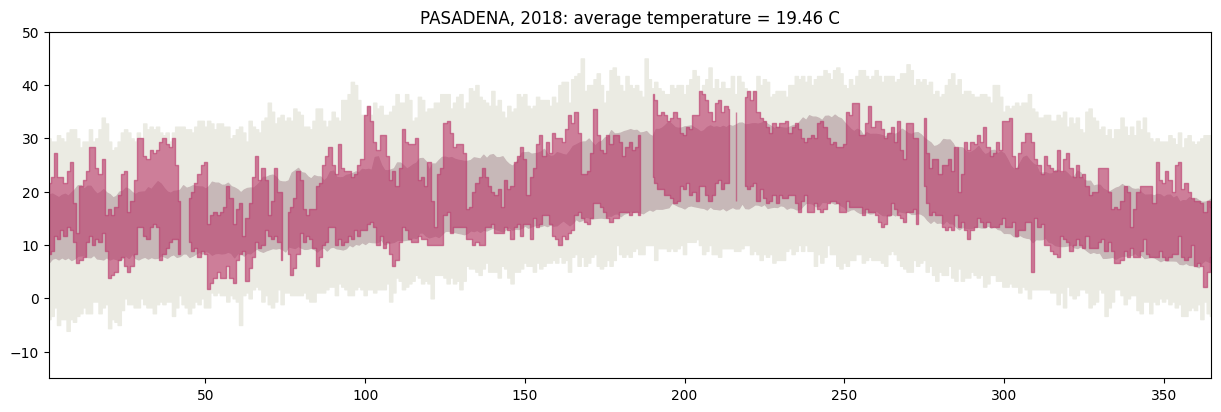

In [625]:
#now with the function above we are going to select a city and make its plot 
nyplot('PASADENA', 2018) #why is here not working? fix this miskate

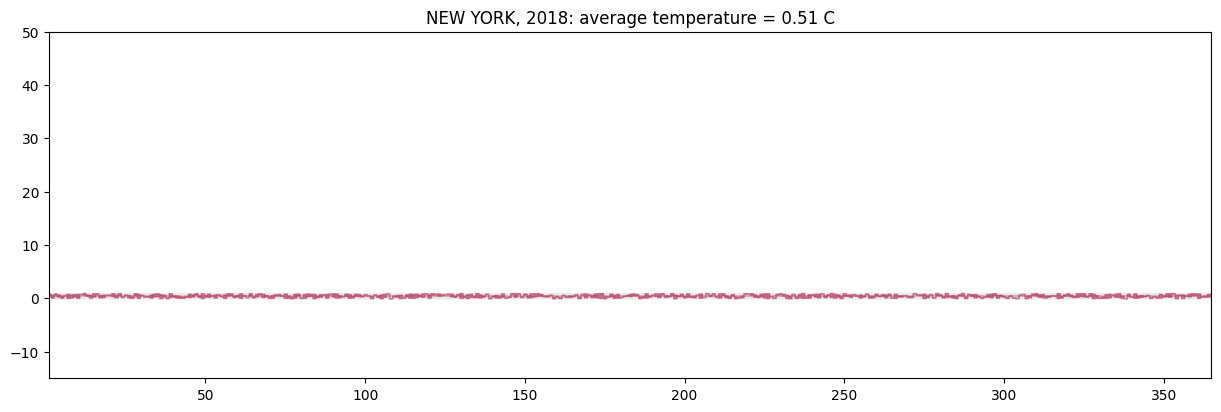

In [626]:
import numpy as np
import matplotlib.pyplot as plt

# Define the placeholder for getweather1 module and getyear function
class getweather1:
    @staticmethod
    def getyear(station, variables, year):
        # Simulate data retrieval; replace this with actual data fetching logic
        np.random.seed(year)  # For reproducibility
        data = {var: np.random.rand(365) for var in variables}  # Simulate 365 days of data for each variable
        return data

def nyplot(station, year):
    plt.figure(figsize=(15, 4.5))  # Define figure size
    
    # All years min and max
    allyears = np.vstack([getweather1.getyear(station, ['TMIN', 'TMAX'], y)['TMIN'] for y in range(1910, 2020)])
    allyears_tmax = np.vstack([getweather1.getyear(station, ['TMIN', 'TMAX'], y)['TMAX'] for y in range(1910, 2020)])
    
    # The normal from the years
    normal = np.vstack([getweather1.getyear(station, ['TMIN', 'TMAX'], y)['TMIN'] for y in range(1981, 2011)])
    normal_tmax = np.vstack([getweather1.getyear(station, ['TMIN', 'TMAX'], y)['TMAX'] for y in range(1981, 2011)])

    # Record extremes
    tmin_record = np.nanmin(allyears, axis=0)
    tmax_record = np.nanmax(allyears_tmax, axis=0)
    
    # The average or normal
    tmin_normal = np.nanmean(normal, axis=0)
    tmax_normal = np.nanmean(normal_tmax, axis=0)

    days = np.arange(1, 366)  # 365 days in one year

    # Filling in the values extreme
    plt.fill_between(days, tmin_record, tmax_record, color=(0.92, 0.92, 0.89), step='mid')
    
    # Filling in the values for normal
    plt.fill_between(days, tmin_normal, tmax_normal, color=(0.78, 0.72, 0.72))
    
    # This year = current
    thisyear = getweather1.getyear(station, ['TMIN', 'TMAX'], year)

    # Uses alpha command and to fill using colors
    plt.fill_between(days, thisyear['TMIN'], thisyear['TMAX'], color=(0.73, 0.21, 0.41), alpha=0.6, step='mid')

    # Determine the axis that will be used 
    plt.axis([1, 365, -15, 50])

    # Obtain the average temperature 
    avg = 0.5 * (np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))
    
    # Title to show the f-string of the station and average temperature
    plt.title(f'{station}, {year}: average temperature = {avg:.2f} C')
    plt.show()

# Example usage
nyplot('NEW YORK', 2018)


In [ ]:
#THE FINAL PROBLEMN: DO NEW YORK ACCROSS ALL YEARS

In [627]:
import getweather1
def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)
# get all historical data for New York, stacked into array



In [628]:
# get all historical data for New York, stacked into array

station = 'pasadena'

allyears = np.arange(1880, 2020)

alldata = np.vstack([getweather1.getyear(station, ['TMIN','TMAX'], year)
                     for year in allyears])

In [629]:
allavg=(np.nanmean(0.5 * (alldata['TMIN'] + alldata['TMAX']), axis=1))
allavg.shape



/var/folders/10/3qb4kyl534n7kxqbg8xlcfqw0000gn/T/ipykernel_47803/2404696481.py:1: RuntimeWarning: Mean of empty slice
  allavg=(np.nanmean(0.5 * (alldata['TMIN'] + alldata['TMAX']), axis=1))


(140,)

In [630]:
allyears.index: 1945

In [631]:
list(allyears).index(1945), list(allyears).index(1955) #list of all the years

(65, 75)

In [632]:
midcentury=np.nanmean(allavg[65:75]) #using to find the mid-century value 


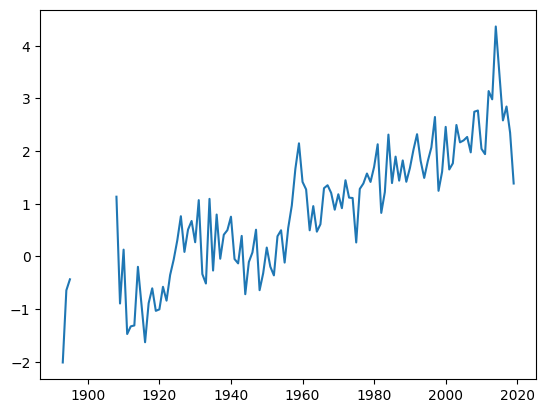

In [633]:
pp.plot(allyears, allavg-midcentury) #here we are going to plot the all years; and the all average - the value of the midcentury

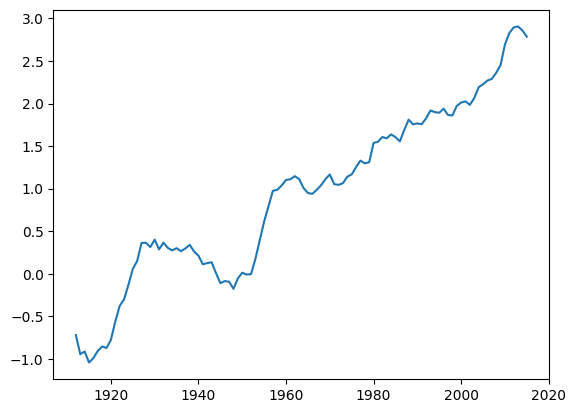

In [634]:
pp.plot(allyears[4:-4],smooth(allavg-midcentury, 9,'valid')) #here a graph will be plotted that consists of a line smooth showing the values


In [635]:
# compute and plot the temperature anomaly time series for any station

allyears = np.arange(1880, 2020)

def plotanomaly(station):
    # grab the data
    alldata = np.vstack([getweather1.getyear(station, ['TMIN','TMAX'], year)
                         for year in allyears])
    
    # make yearly averages, and then the midcentury average
    allavg = np.nanmean(0.5 * (alldata[:,:]['TMIN'] + alldata[:,:]['TMAX']), axis=1)
    midcentury = np.nanmean(allavg[65:75])
    
    # plot with smoothing, adding a label that we can show in a legend
    pp.plot(allyears[4:-4], smooth(allavg - midcentury, 9, 'valid'), label=station)
    
    # set a reasonable range
    pp.axis(ymin=-3,ymax=3)

/var/folders/10/3qb4kyl534n7kxqbg8xlcfqw0000gn/T/ipykernel_47803/3059334998.py:11: RuntimeWarning: Mean of empty slice
  allavg = np.nanmean(0.5 * (alldata[:,:]['TMIN'] + alldata[:,:]['TMAX']), axis=1)


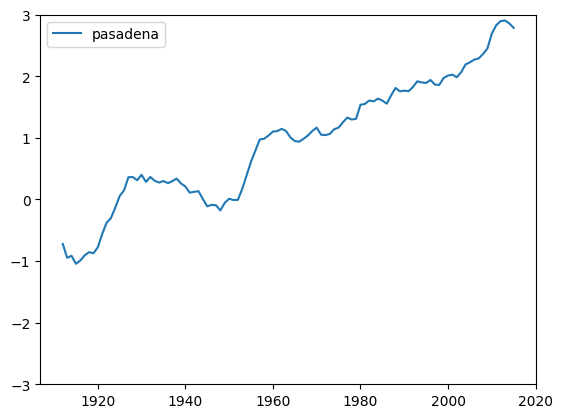

In [636]:
plotanomaly('pasadena')
pp.legend()